<a href="https://colab.research.google.com/github/IngridSchieven/DA_AssignmentPandas250422Ingrid/blob/main/CommHealth1205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%load_ext google.colab.data_table

#read in the CVS files from github URL raw

url = 'https://raw.githubusercontent.com/WincAcademy/practice_data/5acf44e69c236bcf4c3d804fc57efeb2c95826f7/data/community_health/community_health_missing.csv'
df = pd.read_csv(url)
df.head(10)

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,age,gender,race/ethnicity,weight,height,visits
0,36.0,female,group B,NaN,NaN,8.0
1,25.0,female,NaN,NaN,64.0,6.0
2,NaN,male,group C,201.0,NaN,NaN
3,53.0,male,group C,146.0,NaN,12.0
4,44.0,male,NaN,209.0,NaN,NaN
5,NaN,male,group B,NaN,58.0,7.0
6,25.0,female,NaN,NaN,65.0,6.0
7,NaN,male,NaN,NaN,70.0,6.0
8,NaN,female,group E,185.0,NaN,7.0
9,23.0,female,NaN,251.0,61.0,NaN


In [ ]:
#explore the dataset!
df.shape
df.size
df.columns
df.head()
df.tail()
df.info()
df.dtypes 
#df.describe()
#handig om even uit te printen en aantekeningen op te maken

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             696 non-null    float64
 1   gender          703 non-null    object 
 2   race/ethnicity  686 non-null    object 
 3   weight          695 non-null    float64
 4   height          699 non-null    float64
 5   visits          710 non-null    float64
dtypes: float64(4), object(2)
memory usage: 47.0+ KB


age               float64
gender             object
race/ethnicity     object
weight            float64
height            float64
visits            float64
dtype: object

In [ ]:
# missing values overzicht per feature #pythoncursus.nl
for column in df.columns:
    aantal_missing = np.sum(df[column].isnull())
    print('{} - {}'.format(column, aantal_missing))

age - 304
gender - 297
race/ethnicity - 314
weight - 305
height - 301
visits - 290


In [ ]:
#2. Missing values per column - average
#verschillende varianten
#missing_values = round(df.isnull().sum()/len(df) * 100, 2)
#missing_values = df.isnull().mean()/len(df) * 100
missing_values = df.isnull().mean() * 100
print('The percentage of missing values per column: ')
display(missing_values)


The percentage of missing values per column: 


age               30.4
gender            29.7
race/ethnicity    31.4
weight            30.5
height            30.1
visits            29.0
dtype: float64

In [ ]:
# A. add new column with calculate relative - convert pounds to kg
df['bmi'] = round((df['weight'] / (df['height'] * df['height'])) * 703, 2)
display(df.sample(10))

# B. drop rows with relevant values
df2 = df.dropna(subset=['age', 'height', 'weight', 'visits' ])  #dropna(inplace=True) will NOT return a new DataFrame
type(df2)
df3 = df2.drop(columns=['gender', 'race/ethnicity'])
df3.head(5)

# C. Cast age from float to integer
df3.astype({'age': 'int'}).dtypes

,age,gender,race/ethnicity,weight,height,visits,bmi
445,NaN,NaN,group A,247.0,74.0,10.0,31.71
606,31.0,female,group A,203.0,59.0,NaN,41.00
901,40.0,female,group C,238.0,NaN,NaN,NaN
856,37.0,male,NaN,NaN,66.0,21.0,NaN
159,NaN,female,NaN,179.0,70.0,21.0,25.68
530,NaN,NaN,group C,317.0,77.0,NaN,37.59
78,57.0,male,group C,213.0,74.0,NaN,27.34
810,41.0,male,NaN,226.0,72.0,NaN,30.65
912,36.0,male,NaN,227.0,75.0,13.0,28.37
756,NaN,female,group D,139.0,54.0,13.0,33.51


age         int64
weight    float64
height    float64
visits    float64
bmi       float64
dtype: object

In [ ]:
#Strategie Missing Data - using example DataExerciseA #just checking out and testing
def print_separator(sep, num, msg):
  print("\n")
  print(sep * num)
  print(f"{msg}")
  print(sep * num)

#A - LOOKING AT UNIQUE VALUES
def look_at_unique_values(column): 
  unique_values_cutoff = 50
  unique_values = column.unique()
  num_unique_values = len(unique_values)
  if num_unique_values == len(column):
    print(f"Each value in the column is unique (total: {num_unique_values})")
  elif num_unique_values < unique_values_cutoff:
    print(f"Less than {unique_values_cutoff} unique values:")
    # We may get an error when sorting
    try:
      sorted = np.sort(unique_values)
      print("Values are sorted")
      display(list(sorted))
    except:
      print("Could not sort values")
      display(list(unique_values))
  else:
    print(f"More than {unique_values_cutoff} unique values (total: {num_unique_values})")

#B - LOOK AT EDGES AND SORT
def look_at_edges(df3, column_name):
  # inner function
  def show_head_and_tail(values):
      num_items_to_slice = 10
      display(list(values)[:num_items_to_slice])
      display(list(values)[-num_items_to_slice:])

  column = df[column_name]
  unique_values = column.unique()
  try:
      sorted = np.sort(unique_values)
      print("Unique values sorted, head and tail:")
      show_head_and_tail(sorted)
  except TypeError as error:
      print(f"Could not sort values: {error}")
      print("..so let's try filtering NULL values and then sorting")
      non_null_uniques = df.loc[~df[column_name].isnull(), column_name].unique()
      sorted = np.sort(non_null_uniques)
      show_head_and_tail(sorted)

#C - CAST TO TYPE
def cast_to_type(column, maybe_type):
  try:
    column.astype(maybe_type)
    print(f"Casting to {maybe_type} was successful")
  except ValueError as error:
    print(f"Could not cast to {maybe_type}: {error}")


def find_non_default_missing_values(df, column_name, maybe_type):
  long_separator_amount = 75
  short_separator_amount = 35

  print_separator('*', long_separator_amount, f'Finding non default missing values for column \'{column_name}\'')
  print(f'Column \'{column_name}\'has datatype: {df3.dtypes[column_name]}')
  column = df[column_name]

# A - LOOK AT UNIQUE VALUES PER COLUMN
  print_separator("-", short_separator_amount, "A: Looking at unique values")
  look_at_unique_values(column)

# B - SORTING AND LOOKING AT EDGES
  print_separator("-", short_separator_amount, "B: Sorting and looking at the edges")
  look_at_edges(df, column_name)

# C - CASTING TO A TYPE
  print_separator("-", short_separator_amount, f"C: Casting to type: {maybe_type}")
  cast_to_type(column, maybe_type)

# D - LOOKING AT THE FREQUENTIE
  print_separator("-", short_separator_amount, "D: Looking at frequency")
  display(column.value_counts(dropna=False)) #this is the code, no function needed

  print("\n") #just printing a new line

def replace_value(df3, column_name, missing_old, missing_new):
  # ⚠️ Mutates df
  df3[column_name] = df3[column_name].replace({missing_old: missing_new})

replace_value(df3, 'age', 'float', 'int')
find_non_default_missing_values(df3, 'ages', 'int')  

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=4)
imputed = imputer.fit_transform(df3)

df3 = pd.DataFrame(data=imputed, columns = ['age','weight','height','visits','bmi'])
df3.head(10)

,age,weight,height,visits,bmi
0,59.0,197.0,77.0,13.0,23.36
1,38.0,163.0,94.0,8.0,12.97
2,36.0,219.0,72.0,13.0,29.70
3,23.0,186.0,68.0,6.0,28.28
4,63.0,249.0,75.0,12.0,31.12
5,60.0,111.0,59.0,11.0,22.42
6,43.0,139.0,65.0,8.0,23.13
7,62.0,171.0,65.0,13.0,28.45
8,74.0,172.0,64.0,13.0,29.52
9,49.0,198.0,66.0,9.0,31.95


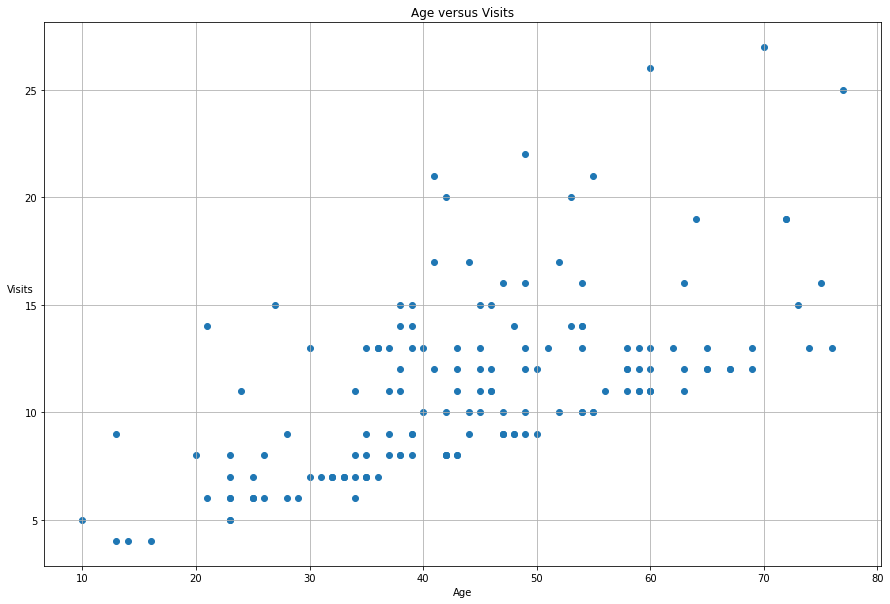

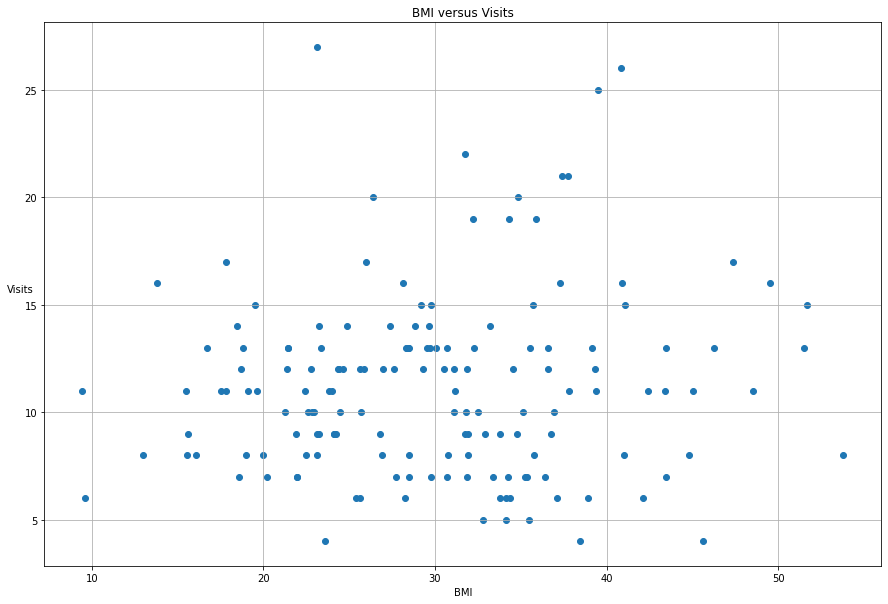

In [ ]:
#make scatterplot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))

x = df3['age']
y = df3['visits']

plt.scatter(x, y)

plt.title('Age versus Visits')
plt.xlabel('Age')
plt.ylabel('Visits', rotation=0)
plt.grid() 

plt.show()

fig, ax = plt.subplots(figsize=(15,10))

x = df3['bmi']
y = df3['visits']

plt.scatter(x, y)

plt.title('BMI versus Visits')
plt.xlabel('BMI')
plt.ylabel('Visits', rotation=0)
plt.grid() 

plt.show()

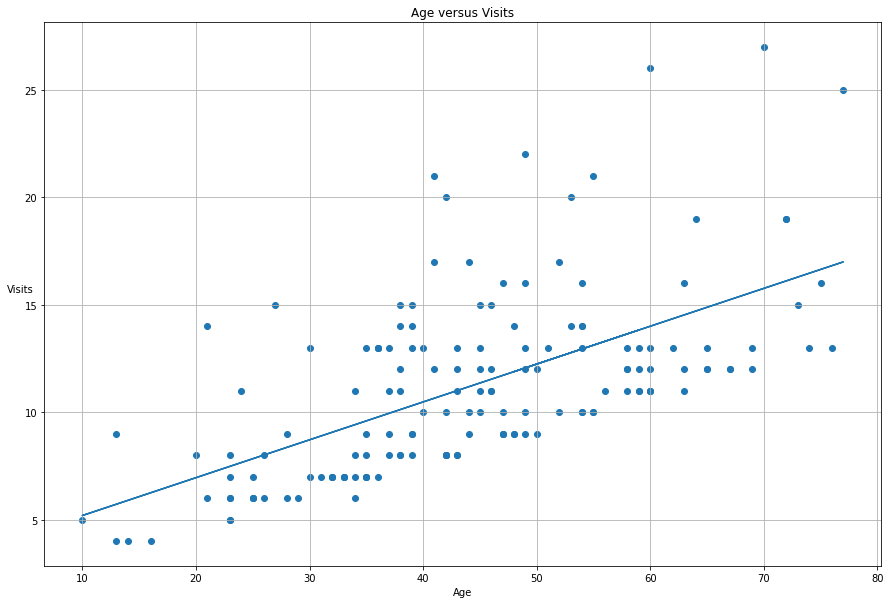

In [ ]:
#make scatterplot 
#add linear regression!!

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))

x = df2['age']
y = df2['visits']

import numpy.polynomial.polynomial as poly

try:
  coefs = poly.polyfit(x, y, 1)
  ffit = poly.polyval(x, coefs)
  plt.plot(x, ffit)
except ValueError as error:
  print(f"Could not plot linear regression line because:{error}")
plt.scatter(x, y)

plt.title('Age versus Visits')
plt.xlabel('Age')
plt.ylabel('Visits', rotation=0)
plt.grid() 

plt.show()

Conclusion: definately a relation between age and number of visits! Not between the visits and the BMI...